Cóidgo de ejemplo

In [16]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import seaborn as sns

otus = pd.read_csv("../data/OTUS_conservados.csv", index_col="X")
otus

,New_Labels,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,...,0.0,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,...,0.0,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,...,0.0,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,...,0.0,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,...,0.0,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.585839,-149.622223,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,...,0.0,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.608533,-149.587633,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.596883,-149.601250,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000


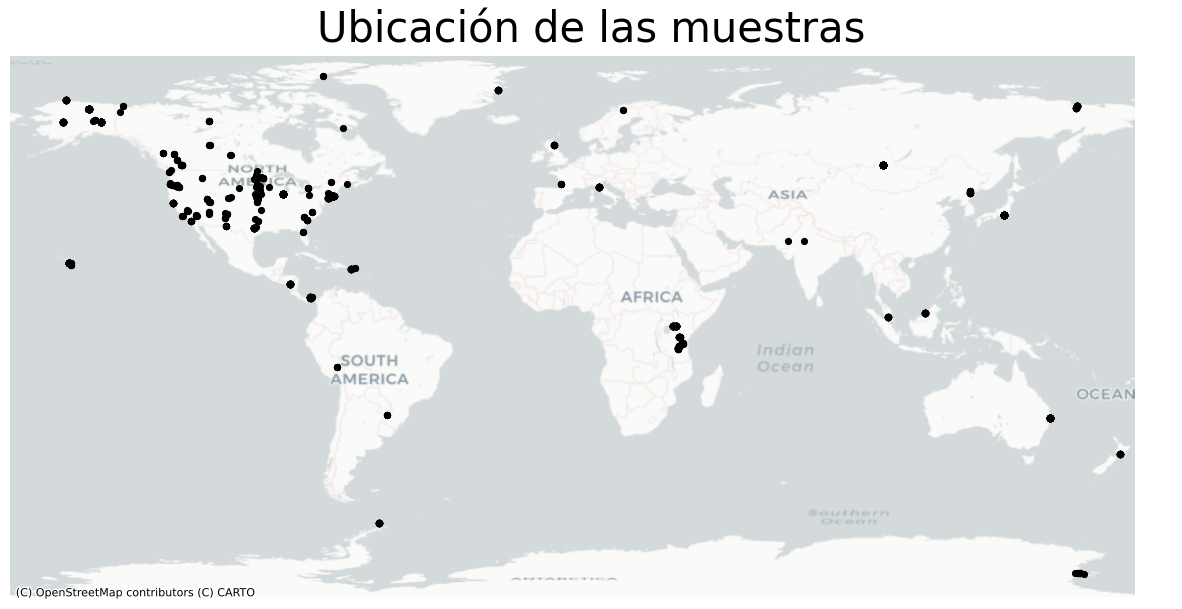

In [12]:
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='black', ax=ax, markersize=70, zorder=1)
plt.title("Ubicación de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

In [29]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
df = otus[cont_names+y_names]
df

,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,X9961,X3944484,X1105039,...,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037,New_Labels
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skd3,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,0.0,0.000000,0.000000,...,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skm1,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skb3,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,0.0,0.000000,0.000000,...,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032,WarmT-SumDry-HotSum0
1001.skm2,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,0.0,0.000000,0.000000,...,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000,WarmT-SumDry-HotSum0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,0.0,0.000028,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000,Snow-FullH-CoolSum8
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000,Snow-FullH-CoolSum8
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000312,...,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000,Snow-FullH-CoolSum8


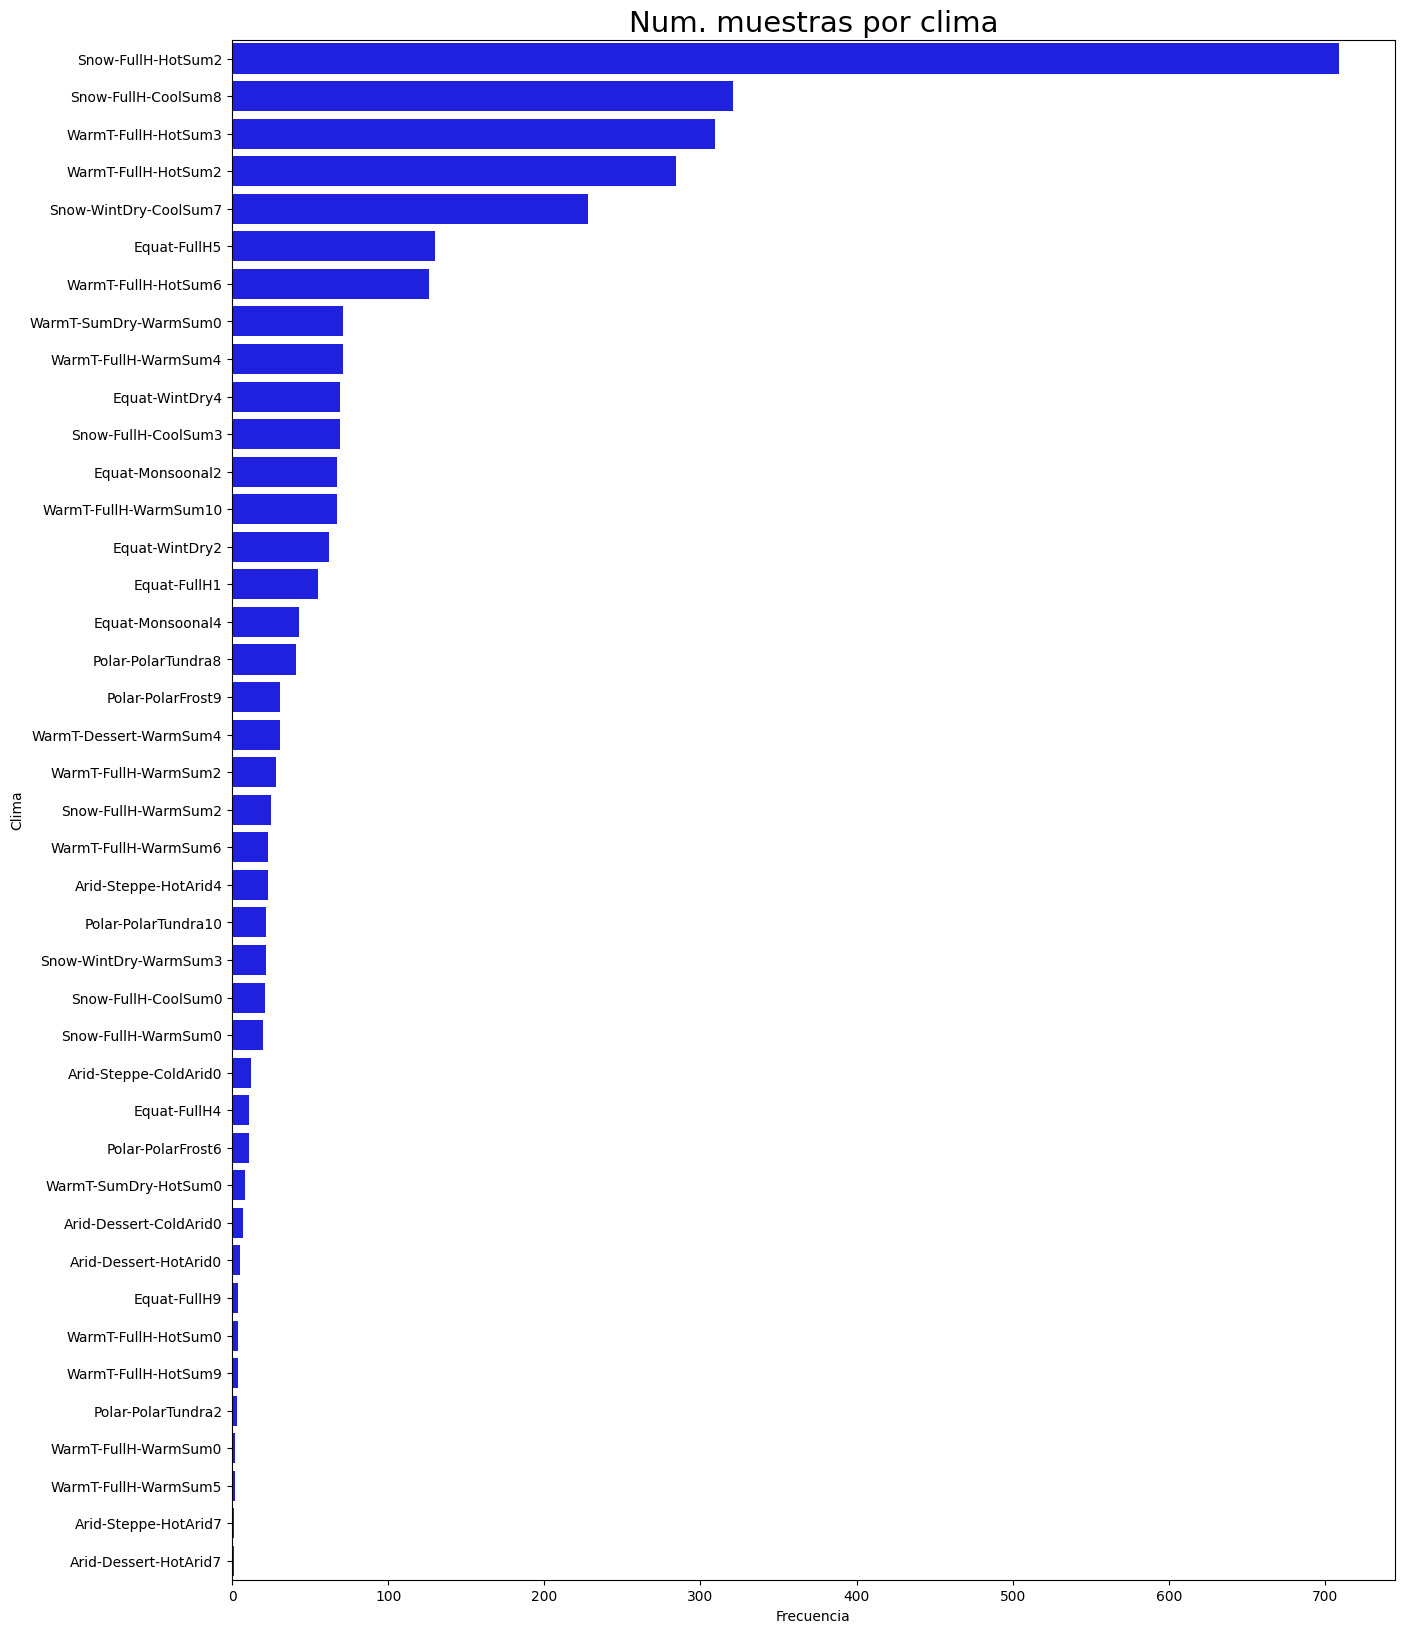

In [32]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=df, y="New_Labels", order=df.New_Labels.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Num. muestras por clima", fontsize=21)
plt.show()

In [42]:
def get_reduced_data(data,y_counts,ylab='New_Labels',n_min=20):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

y_counts = otus.New_Labels.value_counts()

n_min = 50
val_df, y_val = get_reduced_data(df,y_counts,'New_Labels',n_min)

Conjuntos de datos para entrenamiento y prueba

In [43]:
y = np.array(val_df[y_names]).ravel()
X = np.array(val_df.drop(y_names,axis=1)).astype('float')

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


Encoding de la variable de respuesta

In [45]:
le = preprocessing.LabelEncoder()
le.fit(y)
#le.classes_
y_cat = le.transform(y)
#le.inverse_transform(y_cat[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

Pipeline
- estandarizacion
- reduccion de dimension
- clasificacion

In [46]:
pipe_steps = [('std', StandardScaler()), ('dim_red', PCA(n_components=3)), ('classifier', LogisticRegression(solver='newton-cg'))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('dim_red', PCA(n_components=3)),
                ('classifier', LogisticRegression(solver='newton-cg'))])

Predicción y métricas

In [47]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.45      0.44      0.45        43
           2       0.75      0.21      0.33        14
           3       0.71      0.71      0.71        14
           4       0.62      0.50      0.55        16
           5       0.00      0.00      0.00        22
           6       0.67      0.73      0.70       101
           7       0.84      0.94      0.89       228
           8       0.65      0.97      0.78        70
           9       0.89      0.83      0.86        86
          10       1.00      1.00      1.00        87
          11       0.65      0.32      0.43        34
          12       0.67      0.76      0.71        21
          13       0.36      0.20      0.26        20
          14       0.27      0.20      0.23        20

    accuracy                           0.76       792
   macro avg       0.62      0.57      0.58       792
weighted avg       0.73   

/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


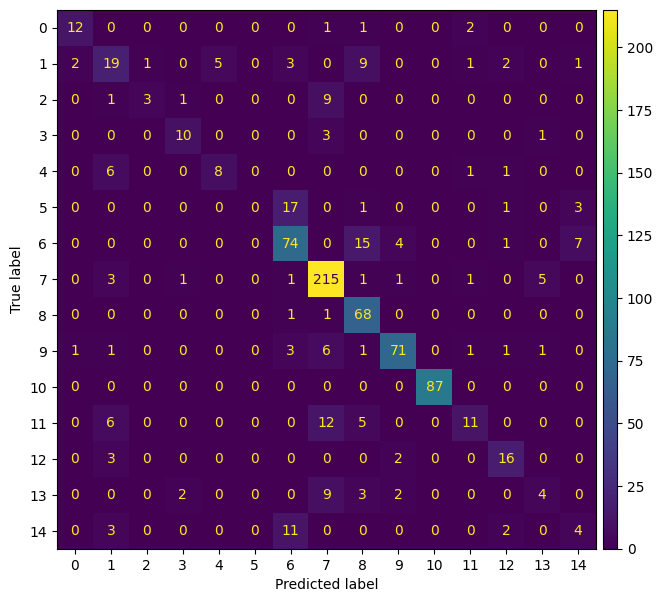

In [49]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);